In [92]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [93]:
#importing csv file
data=pd.read_excel(r"C:\Users\Shubham Hajari\Documents\DATA SCIENCE\INTERNSHIP_FLIP ROBO\Flight Price Prediction Project\Flight_price.xlsx")
data.head()

,Unnamed: 0,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,0,IndiGo,15/01/2023,Delhi,Mumbai,06:30,08:45,2h 15m Non-Stop,Non-Stop,"5,794"
1,1,SpiceJet,15/01/2023,Delhi,Mumbai,07:00,09:15,2h 15m Non-Stop,Non-Stop,"5,794"
2,2,IndiGo,15/01/2023,Delhi,Mumbai,04:45,07:10,2h 25m Non-Stop,Non-Stop,"5,794"
3,3,GO FIRST,15/01/2023,Delhi,Mumbai,02:40,04:50,2h 10m Non-Stop,Non-Stop,"5,801"
4,4,GO FIRST,15/01/2023,Delhi,Mumbai,06:00,08:10,2h 10m Non-Stop,Non-Stop,"5,897"


In [94]:
#checking for the shape of the dataset
data.shape

(3395, 10)

In the dataset there are 3395 entries and 10 attributes

In [95]:
#checking for the null values
data.isnull().sum()

Unnamed: 0         0
airline_name       0
date_of_journey    0
Source             0
Destination        0
depature_time      0
arrival_time       0
duration           0
total_stops        0
Price              0
dtype: int64

There are no null values in the dataset

In [96]:
#checking for dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3395 non-null   int64 
 1   airline_name     3395 non-null   object
 2   date_of_journey  3395 non-null   object
 3   Source           3395 non-null   object
 4   Destination      3395 non-null   object
 5   depature_time    3395 non-null   object
 6   arrival_time     3395 non-null   object
 7   duration         3395 non-null   object
 8   total_stops      3395 non-null   object
 9   Price            3395 non-null   object
dtypes: int64(1), object(9)
memory usage: 265.4+ KB


Al the attributes are object type 

In [97]:
#checking for stats
data.describe()

,Unnamed: 0
count,3395.000000
mean,1697.000000
std,980.196409
min,0.000000
25%,848.500000
50%,1697.000000
75%,2545.500000
max,3394.000000


The average Price of flight is 1697, and max price is 3394.

In [98]:
#Dropping the unwanted column
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [99]:
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,IndiGo,15/01/2023,Delhi,Mumbai,06:30,08:45,2h 15m Non-Stop,Non-Stop,"5,794"
1,SpiceJet,15/01/2023,Delhi,Mumbai,07:00,09:15,2h 15m Non-Stop,Non-Stop,"5,794"
2,IndiGo,15/01/2023,Delhi,Mumbai,04:45,07:10,2h 25m Non-Stop,Non-Stop,"5,794"
3,GO FIRST,15/01/2023,Delhi,Mumbai,02:40,04:50,2h 10m Non-Stop,Non-Stop,"5,801"
4,GO FIRST,15/01/2023,Delhi,Mumbai,06:00,08:10,2h 10m Non-Stop,Non-Stop,"5,897"


In [100]:
#spitting the arriavl column which has string data
data['arrival_time']=data['arrival_time'].str.split(expand=True)
data['arrival_time']

0       08:45
1       09:15
2       07:10
3       04:50
4       08:10
        ...  
3390    20:10
3391    20:10
3392    20:10
3393    20:10
3394    20:10
Name: arrival_time, Length: 3395, dtype: object

In [101]:
#checking the dataset
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,IndiGo,15/01/2023,Delhi,Mumbai,06:30,08:45,2h 15m Non-Stop,Non-Stop,"5,794"
1,SpiceJet,15/01/2023,Delhi,Mumbai,07:00,09:15,2h 15m Non-Stop,Non-Stop,"5,794"
2,IndiGo,15/01/2023,Delhi,Mumbai,04:45,07:10,2h 25m Non-Stop,Non-Stop,"5,794"
3,GO FIRST,15/01/2023,Delhi,Mumbai,02:40,04:50,2h 10m Non-Stop,Non-Stop,"5,801"
4,GO FIRST,15/01/2023,Delhi,Mumbai,06:00,08:10,2h 10m Non-Stop,Non-Stop,"5,897"


In [102]:
# Checking for value counts

In [103]:
data['airline_name'].value_counts()

Multiple Airlines    835
Vistara              791
AirIndia             655
IndiGo               525
AirAsia India        376
GO FIRST             129
SpiceJet              57
Alliance Air          24
Star Air               3
Name: airline_name, dtype: int64

In [104]:
data['Source'].value_counts()

Bangalore    910
Delhi        888
Cochin       463
Kolkata      416
Hyderabad    377
Pune         341
Name: Source, dtype: int64

In [105]:
data['Destination'].value_counts()

Mumbai       1421
Bangalore     980
Cochin        611
Pune          312
Chennai        71
Name: Destination, dtype: int64

In [106]:
data['total_stops'].value_counts()

 1 Stop(s)    2109
 2 Stop(s)     720
Non-Stop       555
 3 Stop(s)      11
Name: total_stops, dtype: int64

### Feature Engineering

In [107]:
data['Price']=data['Price'].str.replace(',', '', regex=True)

In [91]:
data['Price']=data['Price'].astype("int")
data['Price']

0        5794
1        5794
2        5794
3        5801
4        5897
        ...  
3390    26928
3391    27648
3392    28042
3393    29475
3394    29895
Name: Price, Length: 3384, dtype: int32

In [108]:
#replacing the airline names with the repeated data
data['airline_name']=data['airline_name'].replace(['Indigo','Air India','Go First','AirAsia India','Air Asia'],['IndiGo','AirIndia','GO FIRST','AirAsia','AirAsia'])
#replacing the source with the repeated data
data['Source']=data['Source'].replace(['New Delhi','BLR Bangalore','DEL Delhi','HYD Hyderabad','PNQ Pune','COK Cochin'],['Delhi','Bangalore','Delhi','Hyderabad','Pune','Cochin'])
#replacing the destination with the repeated data
data['Destination']=data['Destination'].replace(['BOM Mumbai','BLR Bangalore','COK Cochin'],['Mumbai','Bangalore','cochin'])

In [109]:
#replacing the stops with count
data['total_stops']=data['total_stops'].replace(['1-stop',' 1 Stop(s)','1 Stop'],1)
data['total_stops']=data['total_stops'].replace([' 2 Stop(s)','2+-stop','2 Stop(s)'],2)
data['total_stops']=data['total_stops'].replace([' 3 Stop(s)','3 Stop(s)'],3)
data['total_stops']=data['total_stops'].replace([' 4 Stop(s)'],4)
data['total_stops']=data['total_stops'].replace(['Non-Stop','non-stop','Non Stop'],0)

In [110]:
data['total_stops'].value_counts()

1    2109
2     720
0     555
3      11
Name: total_stops, dtype: int64

In [111]:
#converting the depature_Time into hours,minutes and seconds.
data['Dep_hour']=pd.to_datetime(data['depature_time']).dt.hour
data['Dep_minute']=pd.to_datetime(data['depature_time']).dt.minute

In [112]:
#converting the arrival_Time into hours,minutes and seconds.
data['arr_hour']=pd.to_datetime(data['arrival_time']).dt.hour
data['arr_minute']=pd.to_datetime(data['arrival_time']).dt.minute


In [113]:
#converting the duration column
duration=list(data['duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))        
        

In [114]:
#Equating the hours and minutes of duration column
data['duration_hours']=duration_hours
data['duration_mins']=duration_mins

In [115]:
#Converting the date of journey columns into day month and year 
#Converting the date of journey columns into day month and year 
data['date_of_Journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.day
data['month_of_journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.month
data['year_of_journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.year


In [116]:
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,year_of_journey
0,IndiGo,15/01/2023,Delhi,Mumbai,06:30,08:45,2h 15m Non-Stop,0,5794,6,30,8,45,2,15,15,1,2023
1,SpiceJet,15/01/2023,Delhi,Mumbai,07:00,09:15,2h 15m Non-Stop,0,5794,7,0,9,15,2,15,15,1,2023
2,IndiGo,15/01/2023,Delhi,Mumbai,04:45,07:10,2h 25m Non-Stop,0,5794,4,45,7,10,2,25,15,1,2023
3,GO FIRST,15/01/2023,Delhi,Mumbai,02:40,04:50,2h 10m Non-Stop,0,5801,2,40,4,50,2,10,15,1,2023
4,GO FIRST,15/01/2023,Delhi,Mumbai,06:00,08:10,2h 10m Non-Stop,0,5897,6,0,8,10,2,10,15,1,2023


In [117]:
#Dropping the columns which are converted
data.drop(columns=['date_of_journey','year_of_journey','depature_time','arrival_time','duration'],axis=1,inplace=True)

In [118]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,IndiGo,Delhi,Mumbai,0,5794,6,30,8,45,2,15,15,1
1,SpiceJet,Delhi,Mumbai,0,5794,7,0,9,15,2,15,15,1
2,IndiGo,Delhi,Mumbai,0,5794,4,45,7,10,2,25,15,1
3,GO FIRST,Delhi,Mumbai,0,5801,2,40,4,50,2,10,15,1
4,GO FIRST,Delhi,Mumbai,0,5897,6,0,8,10,2,10,15,1


### Visualisation

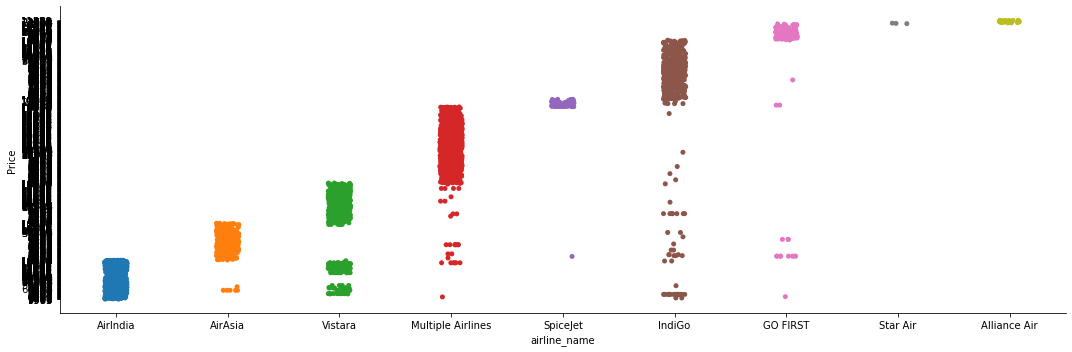

In [120]:
#Lets plot count plot on categorical column and check the data
sns.catplot(y='Price',x='airline_name',data=data.sort_values('Price',ascending=False),height=5,aspect=3)
plt.show()

Comapred to all the other airlines Air india fare is less.

<Figure size 72000x36000 with 0 Axes>

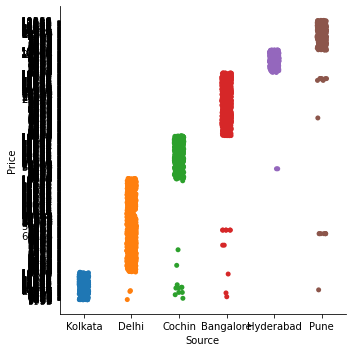

In [121]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(1000,500))
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False))
plt.show()

Choosing a flight from Pune has more fare.

<Figure size 72000x36000 with 0 Axes>

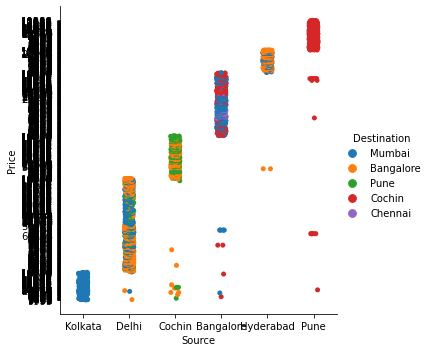

In [122]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(1000,500))
sns.catplot(x='Source',y='Price',hue='Destination',data=data.sort_values('Price',ascending=False))
plt.show()

flight prices are high, when travelling from Pune to Cochin. 

<Figure size 7200x3600 with 0 Axes>

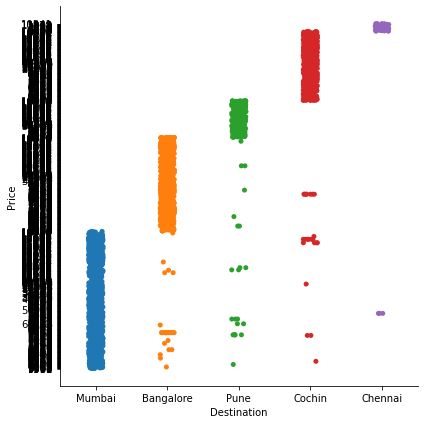

In [123]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False),height=6)
plt.show()

In [ ]:
sns.catplot(x='date_of_Journey',y='Price',hue='month_of_journey',data=data.sort_values('Price',ascending=False))

Travelling on 9th of November the flight fares are high because the flight fares will be high, as the date of journey is near.

In [ ]:
sns.catplot(x='total_stops',y='Price',data=data.sort_values('Price',ascending=False))

Choosing one stop flights results in high fare.

<AxesSubplot:xlabel='Dep_hour', ylabel='Density'>

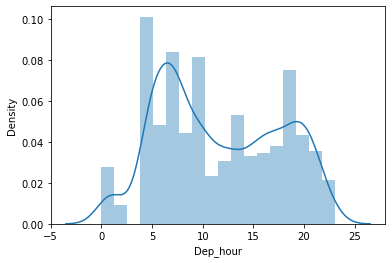

In [32]:
#Dist Plot
sns.distplot(data['Dep_hour'])

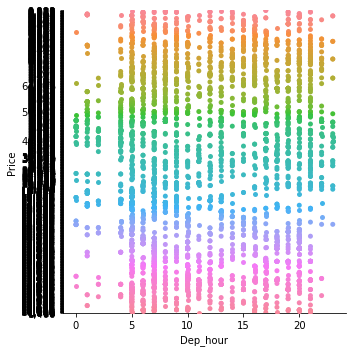

In [33]:
sns.catplot(x='Dep_hour',y='Price',data=data.sort_values('Price',ascending=False))

### HistoGram plots

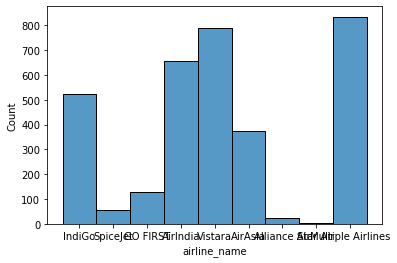

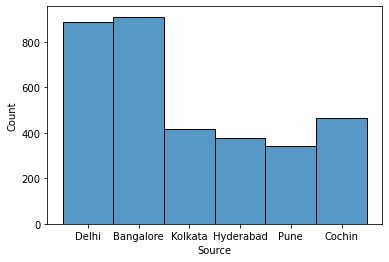

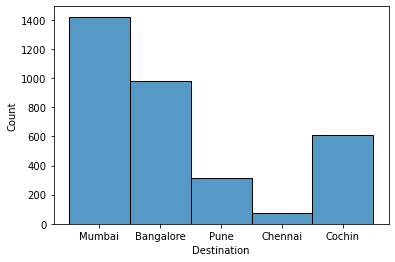

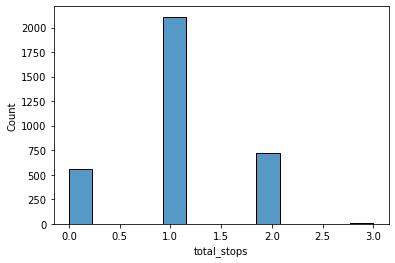

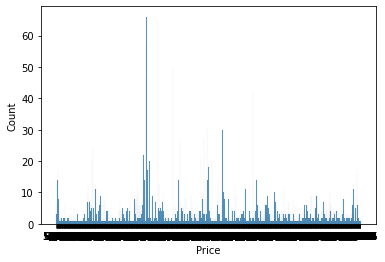

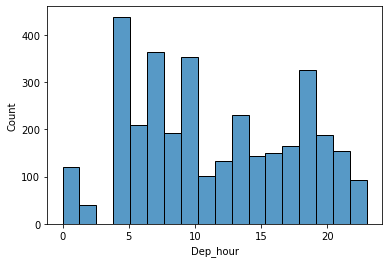

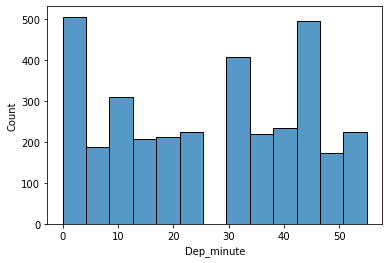

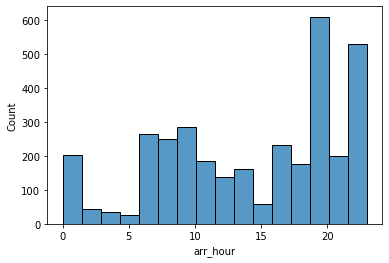

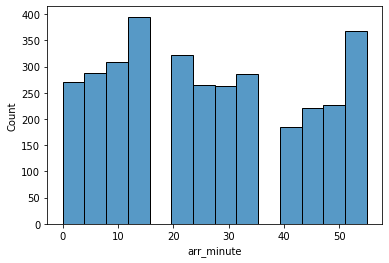

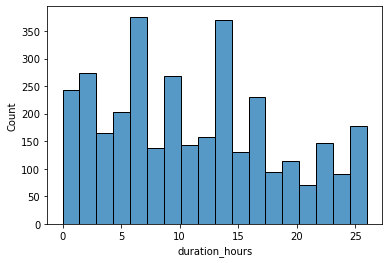

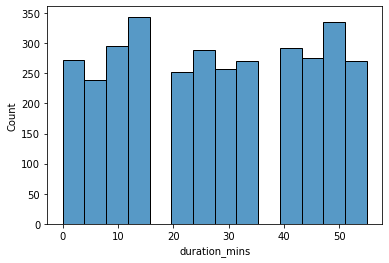

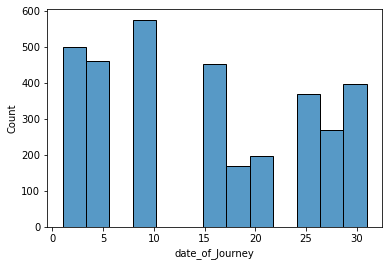

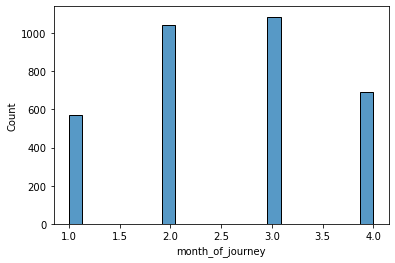

In [34]:
for i in data.columns:

    sns.histplot(data[i])
    plt.show()

In [35]:
#checking for categorical columns
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        cat_col.append(i)
cat_col

['airline_name', 'Source', 'Destination', 'Price']

In [36]:
#checking for numerical columns
num_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        num_col.append(i)
num_col

['total_stops',
 'Dep_hour',
 'Dep_minute',
 'arr_hour',
 'arr_minute',
 'duration_hours',
 'duration_mins',
 'date_of_Journey',
 'month_of_journey']

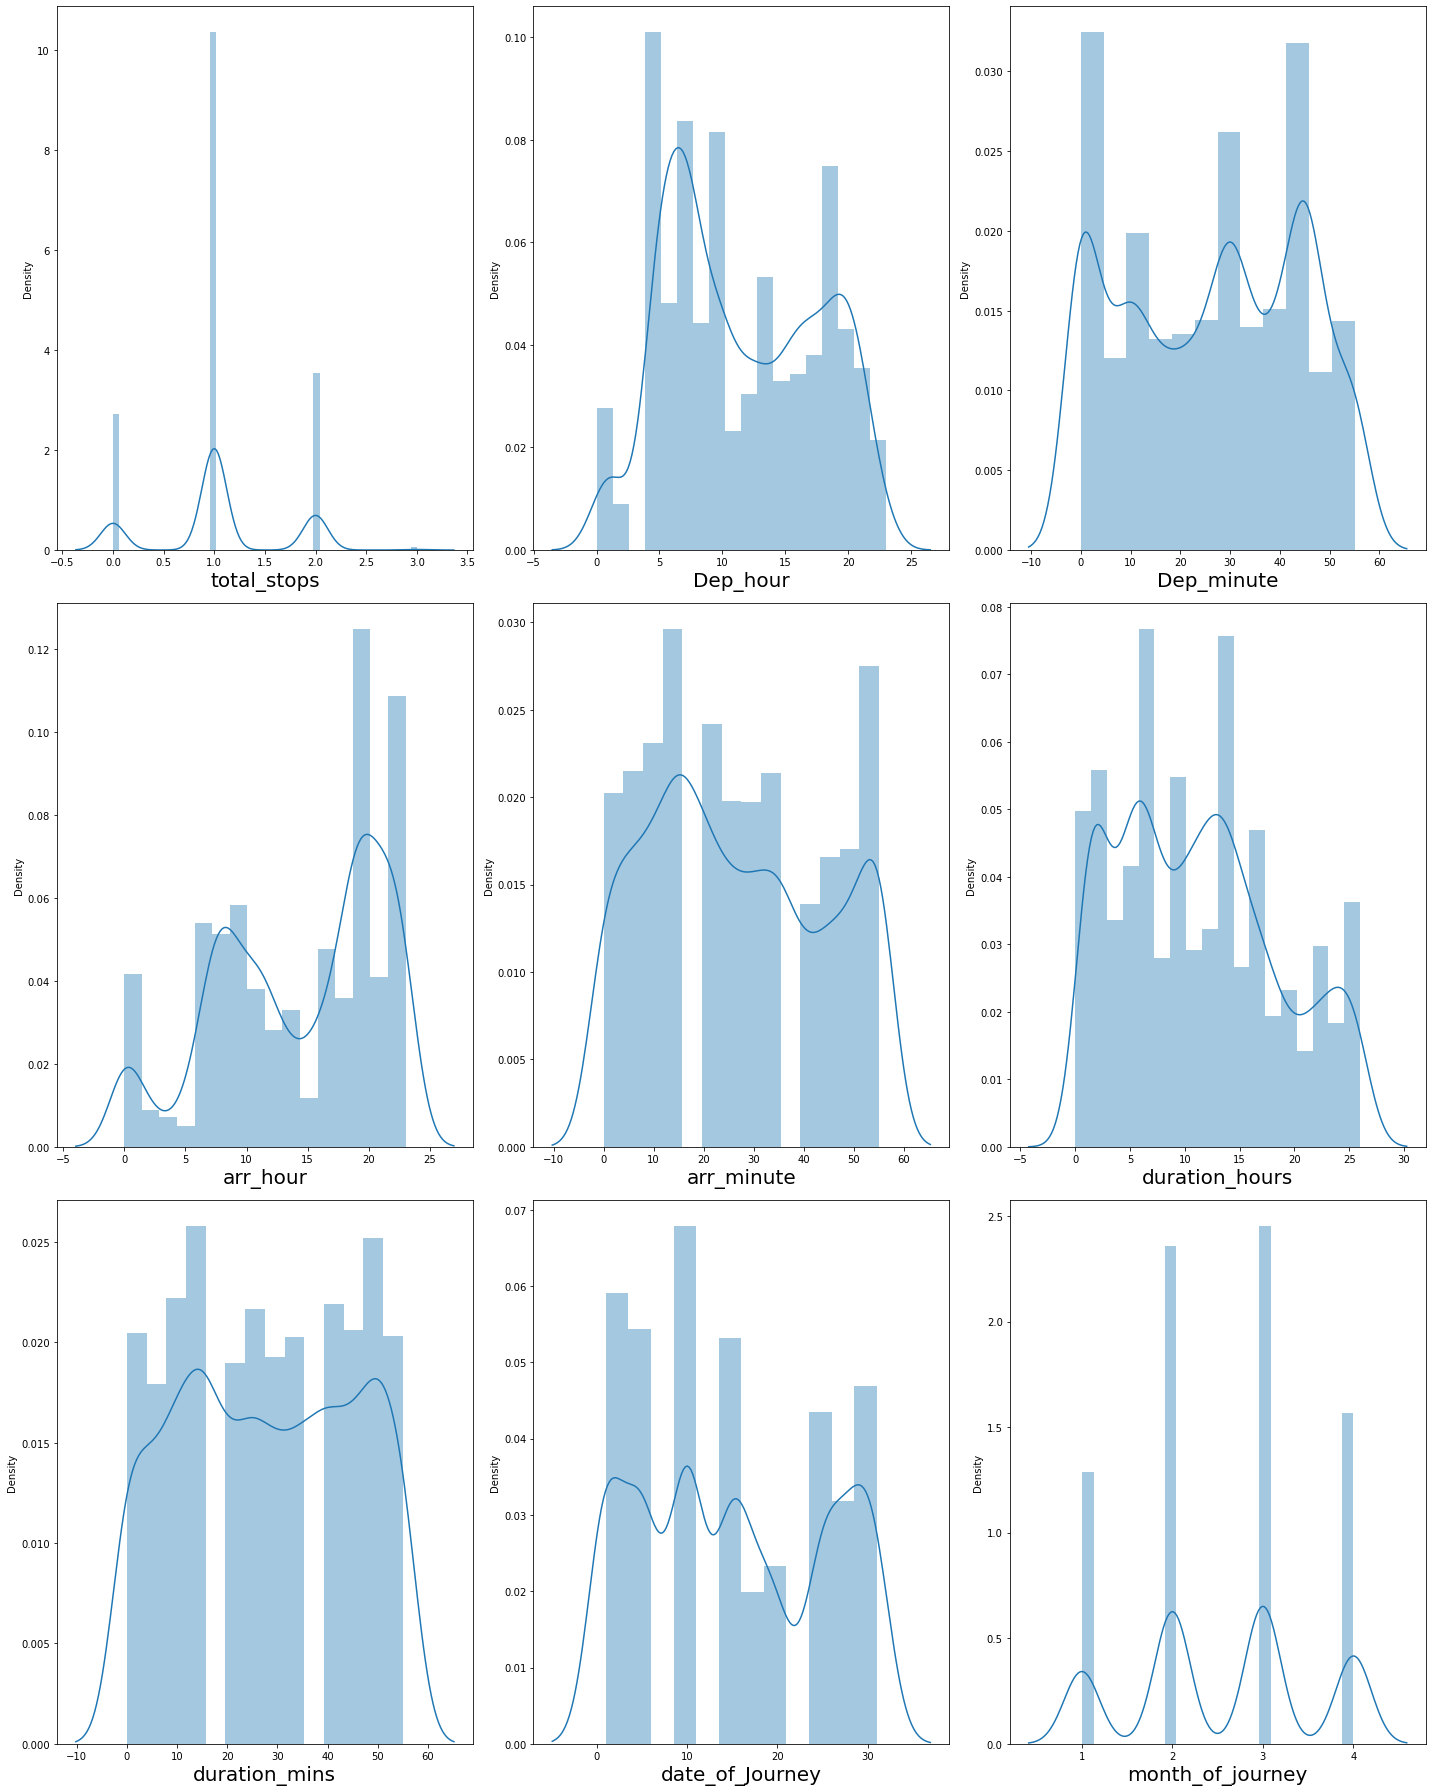

In [37]:
#Now lets plot dist plot and visualise how the data is distributed in each column
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


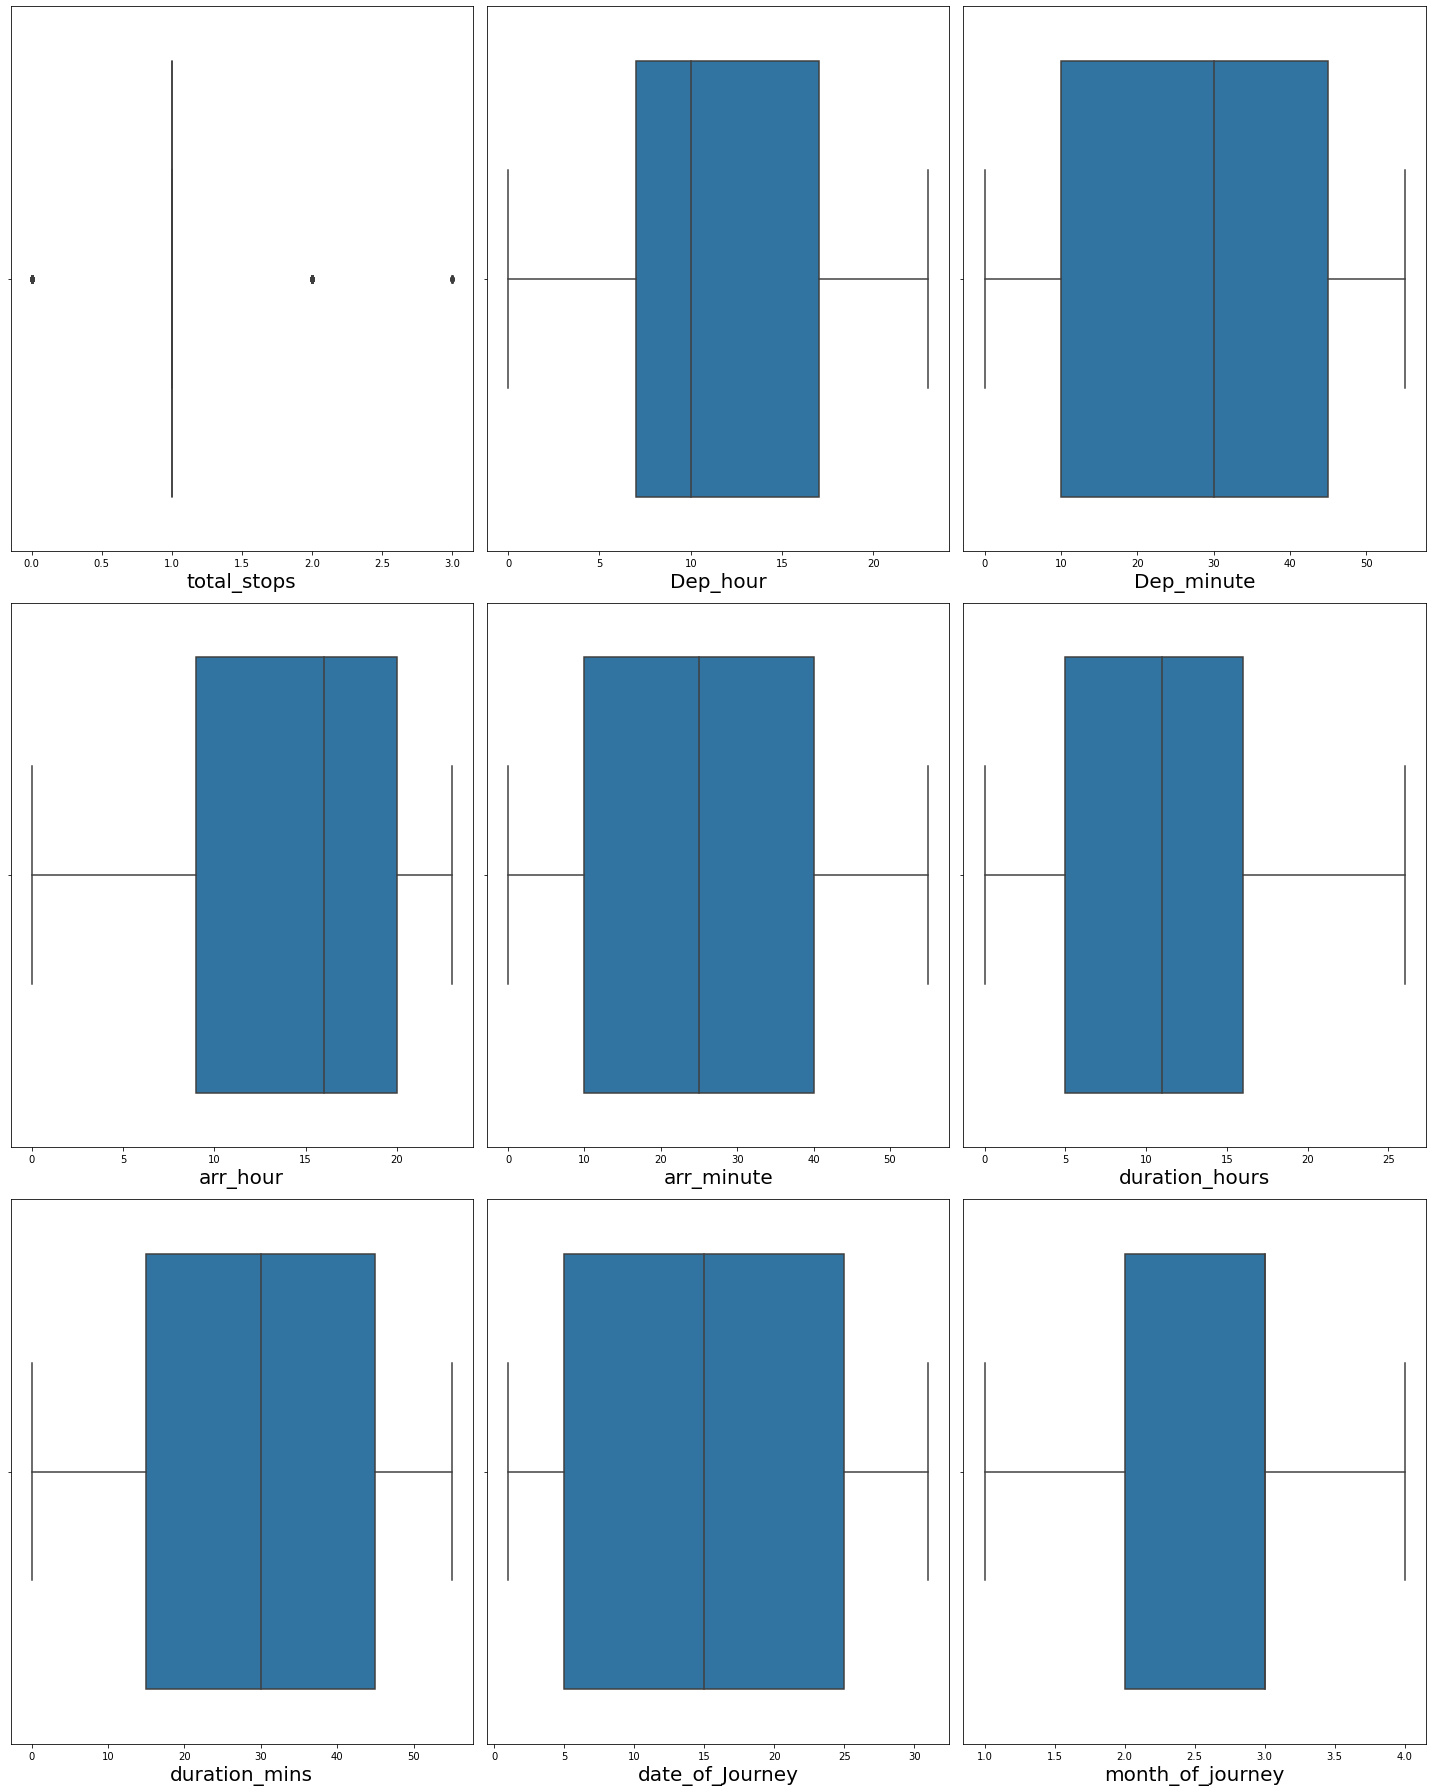

In [38]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


There is some skewness present in the columns

### Z_Score

In [39]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove our outiers using z_score
z=np.abs(stats.zscore(data[num_col]))#abs=absolute numberprint(z)
print(z)

      total_stops  Dep_hour  Dep_minute  arr_hour  arr_minute  duration_hours  \
0        1.699361  0.929471    0.205627  0.938815    1.057834        1.280667   
1        1.699361  0.761613    1.482652  0.789549    0.665185        1.280667   
2        1.699361  1.265186    1.049766  1.088081    0.952355        1.280667   
3        1.699361  1.600901    0.768386  1.535880    1.345003        1.280667   
4        1.699361  0.929471    1.482652  0.938815    0.952355        1.280667   
...           ...       ...         ...       ...         ...             ...   
3390     1.521929  1.097328    0.638512  0.852377    0.952355        0.386033   
3391     1.521929  1.097328    1.049766  0.852377    0.952355        0.386033   
3392     1.521929  1.097328    1.049766  0.852377    0.952355        0.386033   
3393     1.521929  1.097328    0.919892  0.852377    0.952355        0.524925   
3394     1.521929  1.097328    0.919892  0.852377    0.952355        0.524925   

      duration_mins  date_o

In [40]:

print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [2465 2466 2467 2930 2931 2932 2933 2934 2935 3115 3116]


In [41]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [42]:
data.shape

(3384, 13)

In [43]:
#Checking for the % of dataloss
loss_percent=(3435-3365)/1470*100
loss_percent


4.761904761904762

In [44]:
data.reset_index()

,index,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,0,IndiGo,Delhi,Mumbai,0,"5,794",6,30,8,45,2,15,15,1
1,1,SpiceJet,Delhi,Mumbai,0,"5,794",7,0,9,15,2,15,15,1
2,2,IndiGo,Delhi,Mumbai,0,"5,794",4,45,7,10,2,25,15,1
3,3,GO FIRST,Delhi,Mumbai,0,"5,801",2,40,4,50,2,10,15,1
4,4,GO FIRST,Delhi,Mumbai,0,"5,897",6,0,8,10,2,10,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3379,3390,Multiple Airlines,Bangalore,Cochin,2,"26,928",5,15,20,10,14,55,10,4
3380,3391,Multiple Airlines,Bangalore,Cochin,2,"27,648",5,45,20,10,14,25,10,4
3381,3392,Multiple Airlines,Bangalore,Cochin,2,"28,042",5,45,20,10,14,25,10,4
3382,3393,Multiple Airlines,Bangalore,Cochin,2,"29,475",5,10,20,10,15,0,10,4


In [45]:
# As Airline is Nominal Categorical data we will use OneHotEncoding to convert the data

Airlines = pd.get_dummies(data['airline_name'],drop_first=True)

Airlines.head()

,AirIndia,Alliance Air,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,Vistara
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [46]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.get_dummies(data['Source'], drop_first= True)
Source.head()

,Cochin,Delhi,Hyderabad,Kolkata,Pune
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [47]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(data['Destination'], drop_first= True)
Destination.head()

,Chennai,Cochin,Mumbai,Pune
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [48]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,IndiGo,Delhi,Mumbai,0,"5,794",6,30,8,45,2,15,15,1
1,SpiceJet,Delhi,Mumbai,0,"5,794",7,0,9,15,2,15,15,1
2,IndiGo,Delhi,Mumbai,0,"5,794",4,45,7,10,2,25,15,1
3,GO FIRST,Delhi,Mumbai,0,"5,801",2,40,4,50,2,10,15,1
4,GO FIRST,Delhi,Mumbai,0,"5,897",6,0,8,10,2,10,15,1


In [49]:
data=pd.concat([data,Airlines,Source,Destination],axis=1)

In [50]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,AirIndia,Alliance Air,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,Vistara,Cochin,Delhi,Hyderabad,Kolkata,Pune,Chennai,Cochin,Mumbai,Pune
0,IndiGo,Delhi,Mumbai,0,"5,794",6,30,8,45,2,15,15,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,SpiceJet,Delhi,Mumbai,0,"5,794",7,0,9,15,2,15,15,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,IndiGo,Delhi,Mumbai,0,"5,794",4,45,7,10,2,25,15,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,GO FIRST,Delhi,Mumbai,0,"5,801",2,40,4,50,2,10,15,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,GO FIRST,Delhi,Mumbai,0,"5,897",6,0,8,10,2,10,15,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [51]:
#dropping the columns which are encoded
data.drop(columns=['airline_name','Source','Destination'],axis=1,inplace=True)

### Heat Map

<AxesSubplot:>

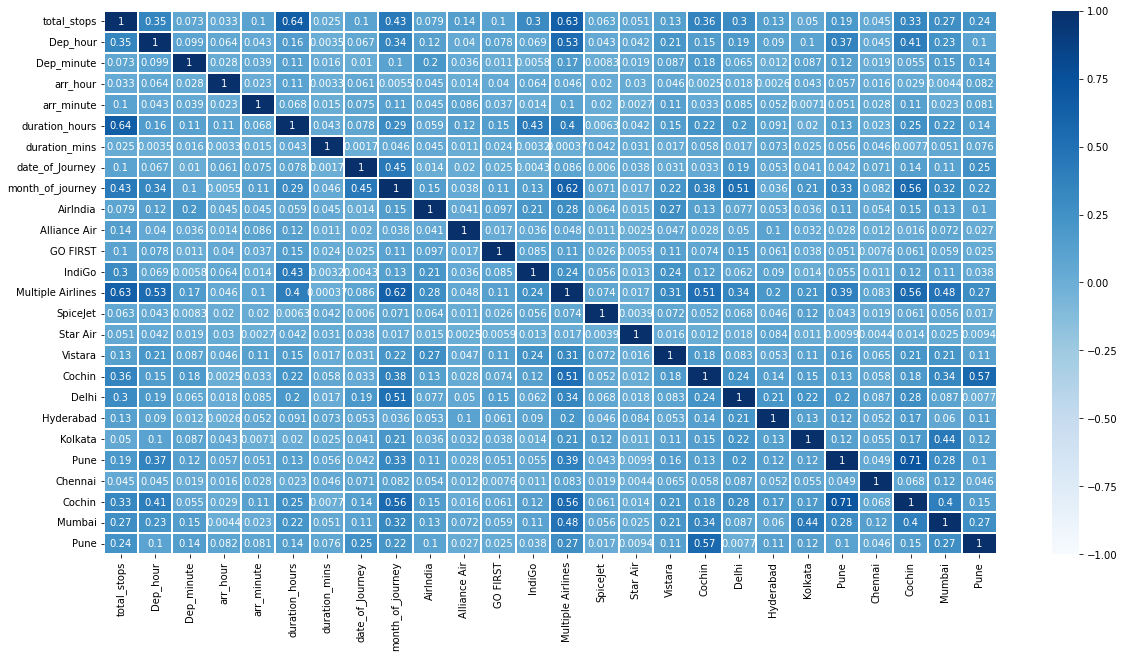

In [52]:
#checking for collinearity
data_corr=data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,cmap='Blues',vmin=-1,vmax=1,annot=True,fmt='.2g',linewidth=0.1,center=0)

1.From heat map the light coloured are less correlated and dark coloured are highly correlated.

2.Even there are some columns which are highly correlated with each other which means there exists multi collinearity problem with pune and cochin columns.

In [55]:
#seperating label and features in x and y variables
x=data.drop(columns=['Price'],axis=1)
y=data['Price']

In [56]:
x.head()

,total_stops,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,AirIndia,Alliance Air,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,Vistara,Cochin,Delhi,Hyderabad,Kolkata,Pune,Chennai,Cochin,Mumbai,Pune
0,0,6,30,8,45,2,15,15,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,7,0,9,15,2,15,15,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,4,45,7,10,2,25,15,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,2,40,4,50,2,10,15,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,6,0,8,10,2,10,15,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [57]:
y

0        5794
1        5794
2        5794
3        5801
4        5897
        ...  
3390    26928
3391    27648
3392    28042
3393    29475
3394    29895
Name: Price, Length: 3384, dtype: int32

In [58]:
#checking for the top 30 important features which contribute in our label prediction
#importing the ExtraTreesRegressor for selecting features
from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()
feature_selection.fit(x,y)

ExtraTreesRegressor()

In [59]:
print(feature_selection.feature_importances_)

[2.33484154e-01 5.71223503e-02 4.67991676e-02 7.37753757e-02
 9.26128240e-02 6.33034451e-02 3.65986752e-02 2.43320417e-02
 6.05918254e-02 4.37922128e-02 1.66347430e-02 5.04482811e-03
 1.47741496e-02 5.25410689e-03 3.82435958e-03 8.68887989e-05
 2.88130798e-02 1.76517139e-02 2.45555707e-02 3.13624304e-03
 3.58028697e-02 1.42104299e-02 1.84472279e-03 2.20494861e-02
 5.97616643e-02 1.41430718e-02]


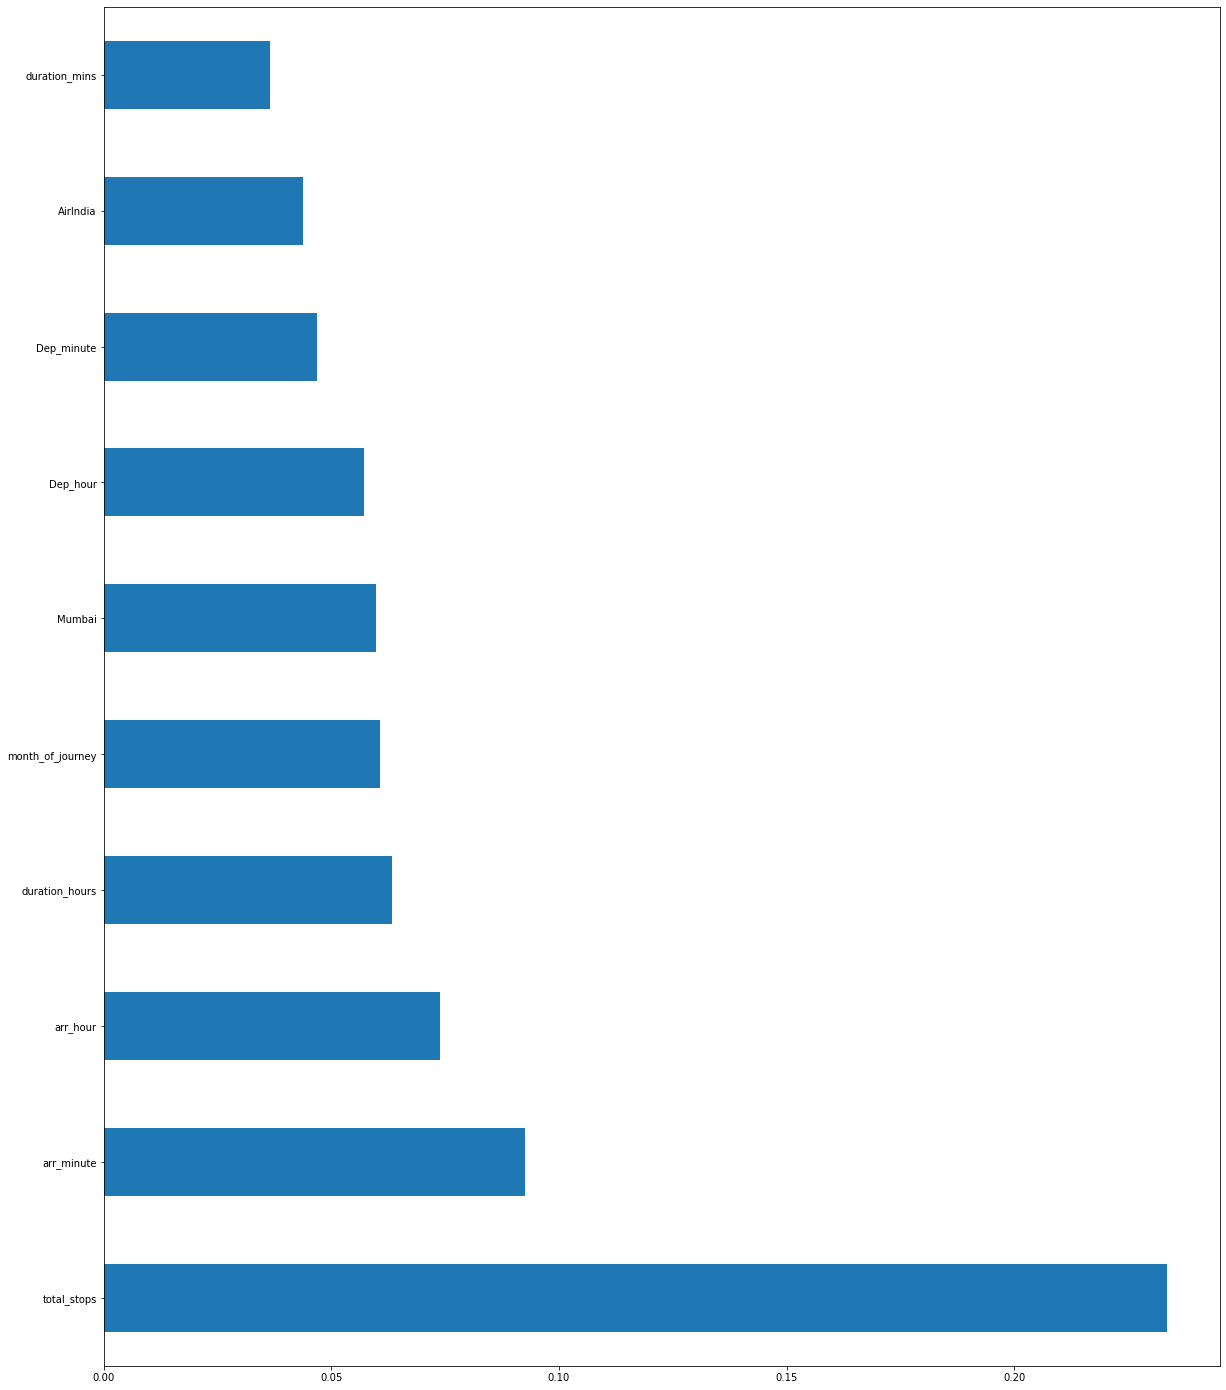

In [60]:
plt.figure(figsize=(20,25))
feature_importances=pd.Series(feature_selection.feature_importances_,index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

Top three best features for our label prediction are moth of journey,total stops and vistara flight among that, month of journey is the top best feature who contributes more for our flight price prediction.

In [62]:
#Treating of skewness using Powertransform function.
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x   

array([[-1.72158957, -0.90361331,  0.32458067, ..., -0.46705733,
         1.1753389 , -0.31530177],
       [-1.72158957, -0.71012656, -1.70563684, ..., -0.46705733,
         1.1753389 , -0.31530177],
       [-1.72158957, -1.32123798,  0.99028503, ..., -0.46705733,
         1.1753389 , -0.31530177],
       ...,
       [ 1.54873296, -1.10658767,  0.99028503, ...,  2.14106479,
        -0.85081843, -0.31530177],
       [ 1.54873296, -1.10658767, -0.79047397, ...,  2.14106479,
        -0.85081843, -0.31530177],
       [ 1.54873296, -1.10658767, -0.79047397, ...,  2.14106479,
        -0.85081843, -0.31530177]])

In [63]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.72158957, -0.90361331,  0.32458067, ..., -0.46705733,
         1.1753389 , -0.31530177],
       [-1.72158957, -0.71012656, -1.70563684, ..., -0.46705733,
         1.1753389 , -0.31530177],
       [-1.72158957, -1.32123798,  0.99028503, ..., -0.46705733,
         1.1753389 , -0.31530177],
       ...,
       [ 1.54873296, -1.10658767,  0.99028503, ...,  2.14106479,
        -0.85081843, -0.31530177],
       [ 1.54873296, -1.10658767, -0.79047397, ...,  2.14106479,
        -0.85081843, -0.31530177],
       [ 1.54873296, -1.10658767, -0.79047397, ...,  2.14106479,
        -0.85081843, -0.31530177]])

In [64]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [65]:
#importing all the required libraries to build our model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

### Linear Regression

In [66]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


Training_score 0.45397317247894586
Testing_score 0.37934321017756023
Mean squared error 14862415.382045673
Mean Absolute error 2574.414124476739
RMSE 3855.1803306778884


### KNeighbors Regressor

In [67]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))


Training_score 0.7294817995618783
Testing_score 0.4895540717117015
Mean squared error 12223276.278770685
Mean Absolute error 2574.414124476739
RMSE 3496.180241173313


### Decision Tree Regressor

In [68]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))


Training_score 0.9576122207256426
Testing_score 0.32559705798044425
Mean squared error 16149435.281350585
Mean Absolute error 1566.4318492251116
RMSE 4018.635997617921


### Random Forest Regressor

In [69]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Training_score 0.9267621748996661
Testing_score 0.5621769023389415
Mean squared error 10484230.331475442
Mean Absolute error 1422.4669820936551
RMSE 3237.9361222043035


### Support vector Regressor

In [70]:
svm=SVR()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
print('Training_score',svm.score(x_train,y_train))
print('Testing_score',svm.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_svm))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_svm))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_svm)))


Training_score -0.0009307535444806891
Testing_score 0.006924973822013625
Mean squared error 23780443.212126266
Mean Absolute error 3488.8675130488473
RMSE 4876.519579795232


### Ada Boost Regressor

In [71]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))


Training_score 0.03417977223713653
Testing_score -0.07152602943701591
Mean squared error 25659052.15783277
RMSE 5065.476498596432


### Extreme Gradient Boost Regressor

In [72]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print('training score:',xgb.score(x_train,y_train))
print('testing score:',xgb.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))


training score: 0.9491471992399961
testing score: 0.54927432265285
Mean squared error 10793198.994896488
RMSE 3285.3004421051796


### Hyper parameter Tuning

In [73]:
#getting best parameters for Linear regression
#Using Grid Search CV for finding the best Parameters
parameters={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':np.arange(0,10)}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}


In [74]:
#Hyperparameter tuning using GridSearchCV for KneighborsRegressor to find best parameters.
parameters={ 'n_neighbors' :np.arange(1,10),'weights':['uniform','distance'],'algorithm':['kd_tree','brute']}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 8, 'weights': 'distance'}


In [75]:
#Hyperparameter tuning using GridSearchCV for DecisionTreeRegressor to find out best parameters.
parameters={ "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[10,20,30,40,50,60,70,80,90] }
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [76]:
#Hyperparameter tuning using GridSearchCV for RandomForestClassifier to find out best parameters.
parameters={ "max_depth":[1,3,5,7,9,11,12],"n_estimators": [10,20,30],"max_features": ["auto", "sqrt", "log2"],"min_samples_split": [2,4,8],"bootstrap":[True, False],"criterion":['mse','friedman_mse']} 
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}


In [77]:
#Hyperparameter tuning using GridSearchCV for Ada boost regressor to find out best parameters.
parameters={'base_estimator':['object',None],'n_estimators':[10,20,30],'learning_rate':[0.1,0.2,0.3,0.4],'loss':['linear', 'square', 'exponential']}
ab=AdaBoostRegressor()
clf=GridSearchCV(ab,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 20}


In [78]:
#Hyperparameter tuning using GridSearchCV for xg boost regressor to find out best parameters.
parameters={'n_estimators':[10,20,30], 'max_depth':np.arange(5,25), 'eta':[0.1,0.2,0.3], 'subsample':np.arange(0,1), 'colsample_bytree':np.arange(0,1)}
xgb=XGBRegressor()
clf=GridSearchCV(xgb,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'colsample_bytree': 0, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0}


### Tuning the models

In [79]:
#Linear REgression
lr=LinearRegression(copy_X= True, fit_intercept=True, n_jobs= 0, normalize=True)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


Training_score 0.45397317247894586
Testing_score 0.37934321017756034
Mean squared error 14862415.382045671
Mean Absolute error 2574.414124476739
RMSE 3855.1803306778884


In [80]:
#KNeighbors Regressor
knn=KNeighborsRegressor(algorithm='kd_tree', n_neighbors=1, weights='uniform')
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))


Training_score 0.9058240490928512
Testing_score 0.2988912274295611
Mean squared error 16788940.32387707
Mean Absolute error 2574.414124476739
RMSE 4097.4309419289875


In [81]:
#DecisionTree Regressor
dt=DecisionTreeRegressor(max_depth= 7, max_features='auto',max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))


Training_score 0.35626754998489385
Testing_score 0.276967306202732
Mean squared error 17313936.47218248
Mean Absolute error 2715.8596176297833
RMSE 4161.001859189981


In [82]:
#RandomForest Regressor
rf=RandomForestRegressor(bootstrap=True,criterion='friedman_mse', max_depth=11,max_features='auto',min_samples_split=4,n_estimators=30)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Training_score 0.8747316504441287
Testing_score 0.5675745807264143
Mean squared error 10354976.064690957
Mean Absolute error 1579.0490993170777
RMSE 3217.9148628717567


In [83]:
#Adaboost Regressor
ab=AdaBoostRegressor(base_estimator= None, learning_rate=0.2,loss='square',n_estimators=10)
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))


Training_score 0.3915556160896475
Testing_score 0.2980486896253868
Mean squared error 16809115.96204949
Mean Absolute error 2817.3310073906123
RMSE 4099.892189076378


In [84]:
#ExtremeGradientboost Regressor
xgb=XGBRegressor(max_depth=30,n_estimators=20)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print('training score:',xgb.score(x_train,y_train))
print('testing score:',xgb.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_xgb))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))


training score: 0.9571517113964042
testing score: 0.5677758922144533
Mean squared error 10350155.405341899
Mean Absolute error 1424.2649663109023
RMSE 3217.1657410431776


In [85]:
#Creating the dataframe for all models
Model=[]
Model.append(('Linear Regression',lr))
Model.append(('KNeighbors Regressor',knn))
Model.append(('DecisionTreeRegressor',dt))
Model.append(('RandomForest Regressor',rf))
Model.append(('AdaBoostRegressor',ab))
Model.append(('Extreme Gradient Boost Regressor',xgb))

In [86]:
Models=[]
Score=[]
MSE=[]
RMSE=[]
MAE=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Model Score
    a=model.score(x_test,y_test)
    print('Model Score: ',a)
    Score.append(a*100)
    print('\n')
    
# MSE
    m=mean_squared_error(y_test,pred)
    print('MSE Score: ',m)
    MSE.append(m)
    print('\n') 
    
#MAE

    m=mean_absolute_error(y_test,pred)
    print('MAE: ',m)
    MAE.append(m)
    print('\n') 
    
# RMSE
    r=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE Score: ',r)
    RMSE.append(r)
    print('\n')


Linear Regression 

LinearRegression(n_jobs=0, normalize=True)


Model Score:  0.37934321017756034


MSE Score:  14862415.382045671


MAE:  2574.414124476739


RMSE Score:  3855.1803306778884


KNeighbors Regressor 

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=1)


Model Score:  0.2988912274295611


MSE Score:  16788940.32387707


MAE:  1712.0283687943263


RMSE Score:  4097.4309419289875


DecisionTreeRegressor 

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)


Model Score:  0.276967306202732


MSE Score:  17313936.47218248


MAE:  2715.8596176297833


RMSE Score:  4161.001859189981


RandomForest Regressor 

RandomForestRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_split=4,
                      n_estimators=30)


Model Score:  0.5584346370668296


MSE Score:  10573843.62799612


MAE:  1569.1542174459591


RMSE Score:  3251.7447052307352


In [87]:
#Making DataFrame
pd.DataFrame({"Models":Models,"Model Score":Score,'Mean Squared Error':MSE,'Mean Absolute Error':MAE,'Root Mean Squared error':RMSE})

,Models,Model Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared error
0,Linear Regression,37.934321,1.486242e+07,2574.414124,3855.180331
1,KNeighbors Regressor,29.889123,1.678894e+07,1712.028369,4097.430942
2,DecisionTreeRegressor,27.696731,1.731394e+07,2715.859618,4161.001859
3,RandomForest Regressor,55.843464,1.057384e+07,1569.154217,3251.744705
4,AdaBoostRegressor,27.919807,1.726052e+07,2884.171431,4154.577969
5,Extreme Gradient Boost Regressor,56.777589,1.035016e+07,1424.264966,3217.165741


In [88]:
#getting the 15 predicted values and comapring with the test values
print(y_pred_xgb[:15])
print(y_test.values[:15])

[ 7928.1943  8726.141   5194.898   5478.535  12449.585   3160.5208
 10584.212   5335.913   8770.908   7776.4746 13049.48    7399.063
  6673.908  16942.322  15629.355 ]
[ 7908  7967  5691 15097 12264  3550 11075  4827  9383  8793 13122  6872
  6342 16947 12929]


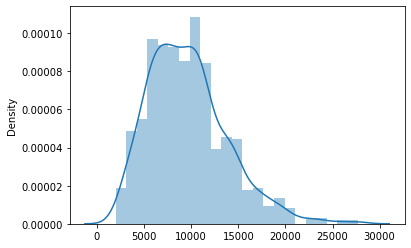

In [89]:
#Scatter plot for test data prediction
sns.distplot(y_pred_xgb)
plt.show()

The predicted values are normally distributed.

In [ ]:
#Scatter plot
plt.scatter(x=y_test, y=y_pred_xgb)
plt.grid(True)

In [ ]:
import joblib
joblib.dump(xgb,"Flight price prediction")

Extreme gradient boost regressor is giving best patterns for our data. I have finalised based on the test score and the RMSE value as it has the least Value compared to other models.

We have hit 56.7% of score with XGBoost Regressor.

### After Analysis

1. I have plotted hist plot and found that the prices of the flights are going high and low frequently, they are not fixed at a time.

2. Same from hist plot I found the prices are increasing in the large  amounts.

3. Early hour flight fares are less, as the time goes the flight Fares increases and midnight flight fares are less. 

4. By plotting cat plot I found that the prices are tending to go up as the time is approching.

5. By plotting catplot I found Early morning flights are cheaper compared to working hours.

6. By plotting catplot I got to know that, Almost Both indigo and spice jet airways having same fare.

7. Morning Fares are less compared to other timings flight fares.